In [1]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs --break-system-packages
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO --break-system-packages

In [2]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO

In [3]:
# !pip install -e ../../objFuncs
# !pip install -e ../../pyBO

In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import pandas as pd

In [5]:
import objFuncs
from objFuncs import VM
from objFuncs import residuals
from objFuncs.util import plot_obj_history
from objFuncs import flame_utils_kilean as flame_utils

objFuncs version: 1.1.0. updated on 2023-12-04


In [6]:
decision_CSETs=[
    'FS2_BTS:PSC2_D3930:I_CSET',
]
objective_goal = { 
    'FS2_WD12:BPM_D3943:XPOS_RD': 0.0,     #(mm)
#     'FS2_BTS:BPM_D3958:XPOS_RD' : 0.0, 
}
objective_norm = { 
    'FS2_WD12:BPM_D3943:XPOS_RD': 1.0,     #(mm)
#     'FS2_BTS:BPM_D3958:XPOS_RD' : 1.0, 
}
objective_weight = { 
    'FS2_WD12:BPM_D3943:XPOS_RD': 1.0,     #(mm)
#     'FS2_BTS:BPM_D3958:XPOS_RD' : 1.0, 
}
objective_RDs = list(objective_goal.keys())

In [7]:
vm_ = flame_utils.VM(
                    latfile = "test_FS2a_20231130_040841_read.lat",
                    decision_CSETs = decision_CSETs,
                    objective_RDs  = objective_RDs
)

'test_FS2a_20231130_040841_read.lat' does not exist in current working path.
FLAME lattice file found from lat repo: 
    /home/devuser/Desktop/WinHome/GitHub/objFuncs/objFuncs/FLAME_lat/test_FS2a_20231130_040841_read.lat


In [8]:
vm = VM(
        x0 = vm_.x0,
        fun = vm_,
        decision_CSETs = decision_CSETs,
        objective_RDs  = objective_RDs,
        )

In [9]:
objFuncs._global_machineIO.fetch_data = vm.fetch_data
objFuncs._global_machineIO.ensure_set = vm.ensure_set
objFuncs._global_machineIO._test = True

In [10]:
res = residuals.residualObj(  
    decision_CSETs = decision_CSETs,
    decision_min= -2,
    decision_max=  2,
    objective_goal = objective_goal,
    objective_norm = objective_norm,
    objective_weight = objective_weight,
    )

======== class info ========
init_time: 2023-12-15 10:40:04.629458
class_hierarchy: [
    residualObj, objFuncBase]
decision_CSETs: [
    FS2_BTS:PSC2_D3930:I_CSET]
decision_min: [-2.]
decision_max: [2.]
decision_bounds: [[-2.  2.]]
decision_RDs: [
    FS2_BTS:PSC2_D3930:I_RD]
decision_tols: None
decision_couplings: None
history_buffer_size: None
logging_frequency: inf
logging_tag: 
logging_fname: None
x0: [
    -15.990100000000002]
objective_goal: {'FS2_WD12:BPM_D3943:XPOS_RD': 0.0}
objective_norm: {'FS2_WD12:BPM_D3943:XPOS_RD': 1.0}
objective_weight: {'FS2_WD12:BPM_D3943:XPOS_RD': 1.0}
objective_RDs: [
    FS2_WD12:BPM_D3943:XPOS_RD]



In [11]:
vm_.x0, res.x0

([-15.990100000000002], [-15.990100000000002])

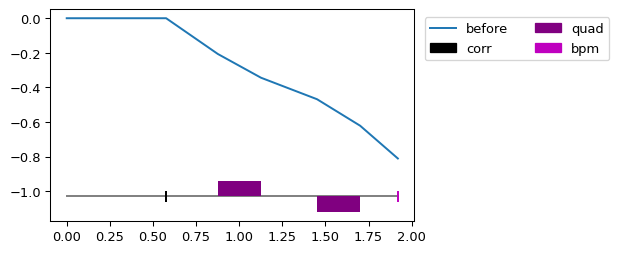

In [12]:
r0,s = vm_.fm.run(monitor='all',to_element=vm_.last_elem_index)
r0 = vm_.fm.collect_data(r0,'pos','xcen','ycen')
fig,ax = plt.subplots(figsize=(5,3),dpi=94)
ax.plot(r0['pos'],r0['xcen'],label='before')
vm_.fm.plot_lattice(end=vm_.last_elem_index+1,ax=ax,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1])

In [13]:
plot_decision = plot_obj_history(
            res.history['decision_CSETs'],
            )

plot_RDs = plot_obj_history(
            res.history['objective_RDs'],
            )
plot_objs = plot_obj_history(
            res.history['objectives'],
            )
callbacks = [plot_decision,plot_RDs,plot_objs]

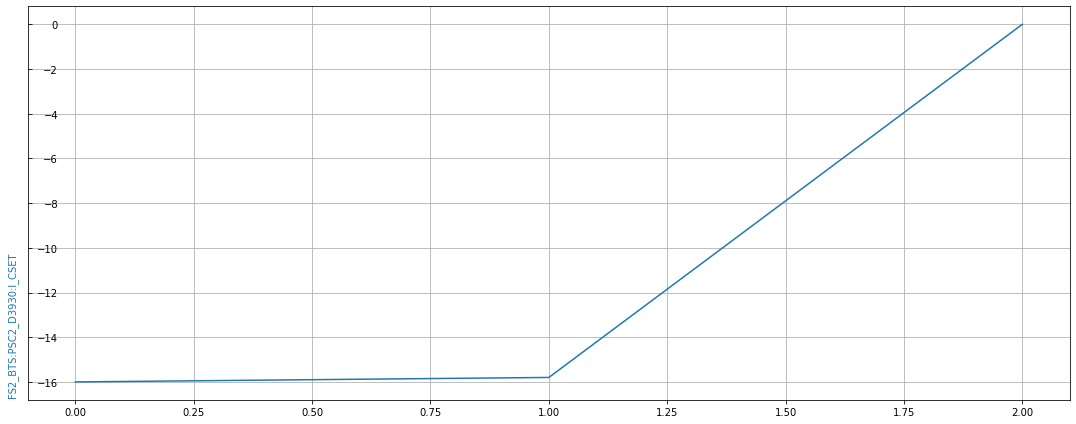

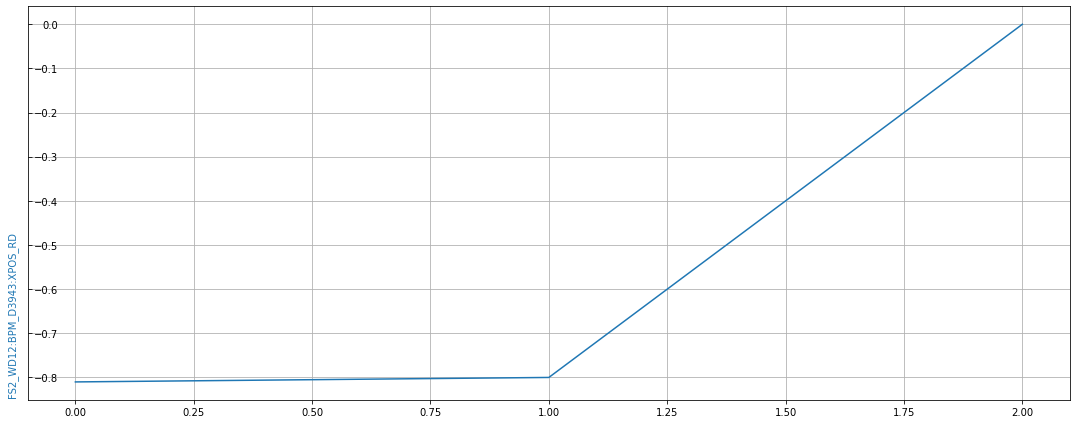

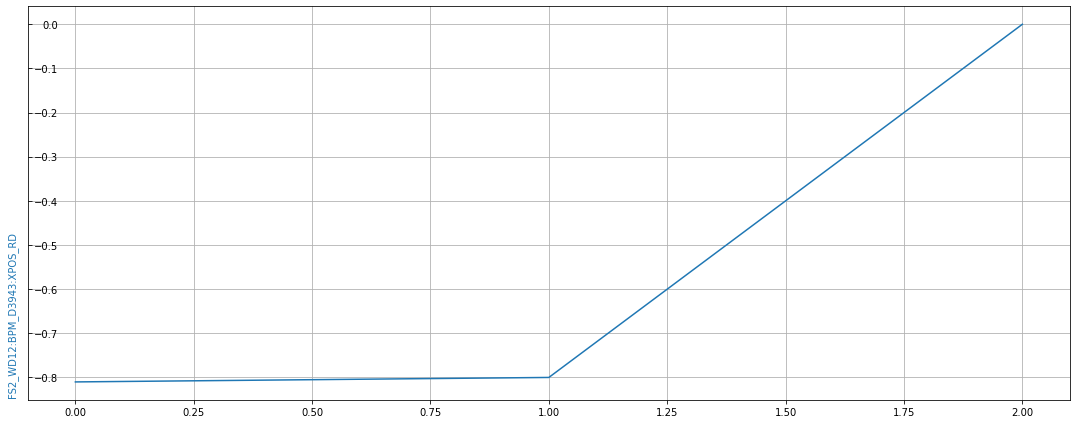

In [14]:
result = res.lsq_linear(jac_use3points=False,callbacks=callbacks)
for f in callbacks:
    f.close()

In [15]:
pd.DataFrame(res.history['jacobian']['values'], columns=res.history['jacobian']['names'])

,d FS2_WD12:BPM_D3943:XPOS_RD/d FS2_BTS:PSC2_D3930:I_CSET
0,0.050695


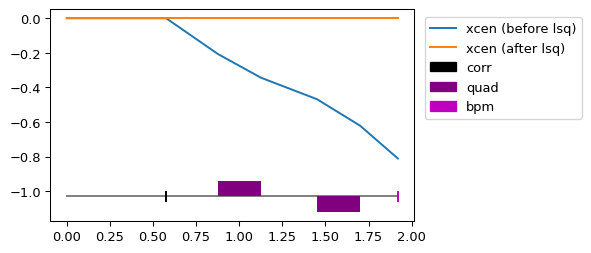

In [16]:
r1,s = vm_.fm.run(monitor='all',to_element=vm_.last_elem_index)
r1 = vm_.fm.collect_data(r1,'pos','xcen','ycen')
fig,ax = plt.subplots(figsize=(5,3),dpi=94)
ax.plot(r0['pos'],r0['xcen'],label='xcen (before lsq)')
ax.plot(r1['pos'],r1['xcen'],label='xcen (after lsq)')
plot_handler = objFuncs.flame_utils._plot_lattice(vm_.fm.machine)
plot_handler(end=vm_.last_elem_index+1,ax=ax,ymin=ax.get_ylim()[0],ymax=ax.get_ylim()[1],legend_ncol=1)